Filter example from:
https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

from scipy.constants import c,pi,mu_0,epsilon_0
from Luis_Functions import *

In [3]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def pulse(t,t0,tau): 
    #return np.exp(-((t-t0)/tau)**2) #Gaussian
    return 1/np.cosh((t-t0)/tau)

L_unit = 1e-6 #microns
f_unit = 1e12 #THz
t_unit = 1/f_unit #ps

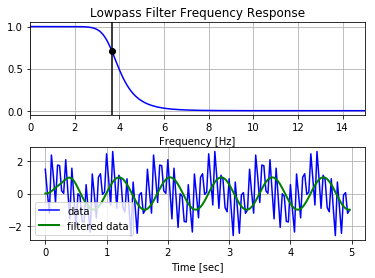

In [4]:
# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

GHz filter for optical detection...

Text(0,0.5,'Electric Field (V/m)')

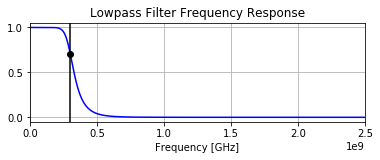

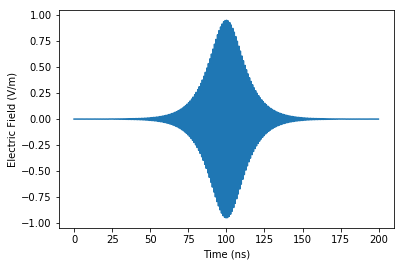

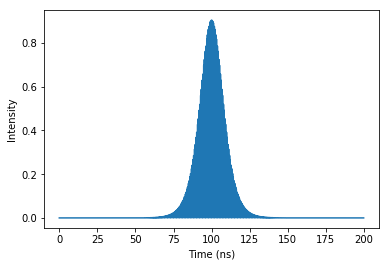

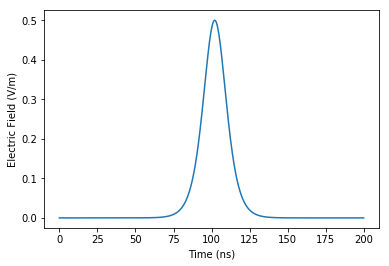

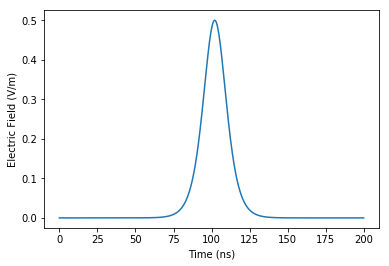

In [7]:
freq_0 = 1e9
w_0 = 2*pi*freq_0

#Time step
fs = 5*freq_0
dt = 1/fs
STEPS = 1000
t = np.arange(0,STEPS*dt,dt)


######################################################
######################################################

# Filter requirements.
order = 6
cutoff = 300e6

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [GHz]')
plt.grid()

######################################################
######################################################

bandwidth = 100e6
tau = 1/bandwidth
t0 = 10*tau
y_source = np.sin(w_0*t)*pulse(t,t0,tau)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e9,y_source)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Electric Field (V/m)')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e9,y_source**2)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Intensity')

#FILTER
y_filtered = butter_lowpass_filter(y_source**2, cutoff, fs, order)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e9,y_filtered)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Electric Field (V/m)')

#Detector
y_filtered = detector(y_source, fs, cutoff)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e9,y_filtered)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Electric Field (V/m)')